In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import os
os.getcwd()
os.chdir('C:\D\XAI\Demo\package')
import Eric_XAI_Classification_numeric as xai
# load the data
sensor_data= pd.read_csv('C:\\D\\XAI\\Demo\\Dummy_KPI_data.csv')

# see the availabe attributes of module
dir(xai)

['DecisionTreeClassifier',
 'FeatureBinarizer',
 'LogisticRegression',
 'LogisticRuleRegression',
 'RFE',
 'RandomForestClassifier',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aix360',
 'data_explainability',
 'logistic_feature_imp',
 'logstic_rule_reg',
 'math',
 'metrics',
 'np',
 'pd',
 'plot_distribution',
 'plt',
 'reduce',
 'rf_var_imp',
 'rfe_random_forest',
 'shap',
 'shap_dt_explanation',
 'shap_plot',
 'sns',
 'stats',
 'train_test_split',
 'warnings',
 'xgb',
 'xgboost_imp']

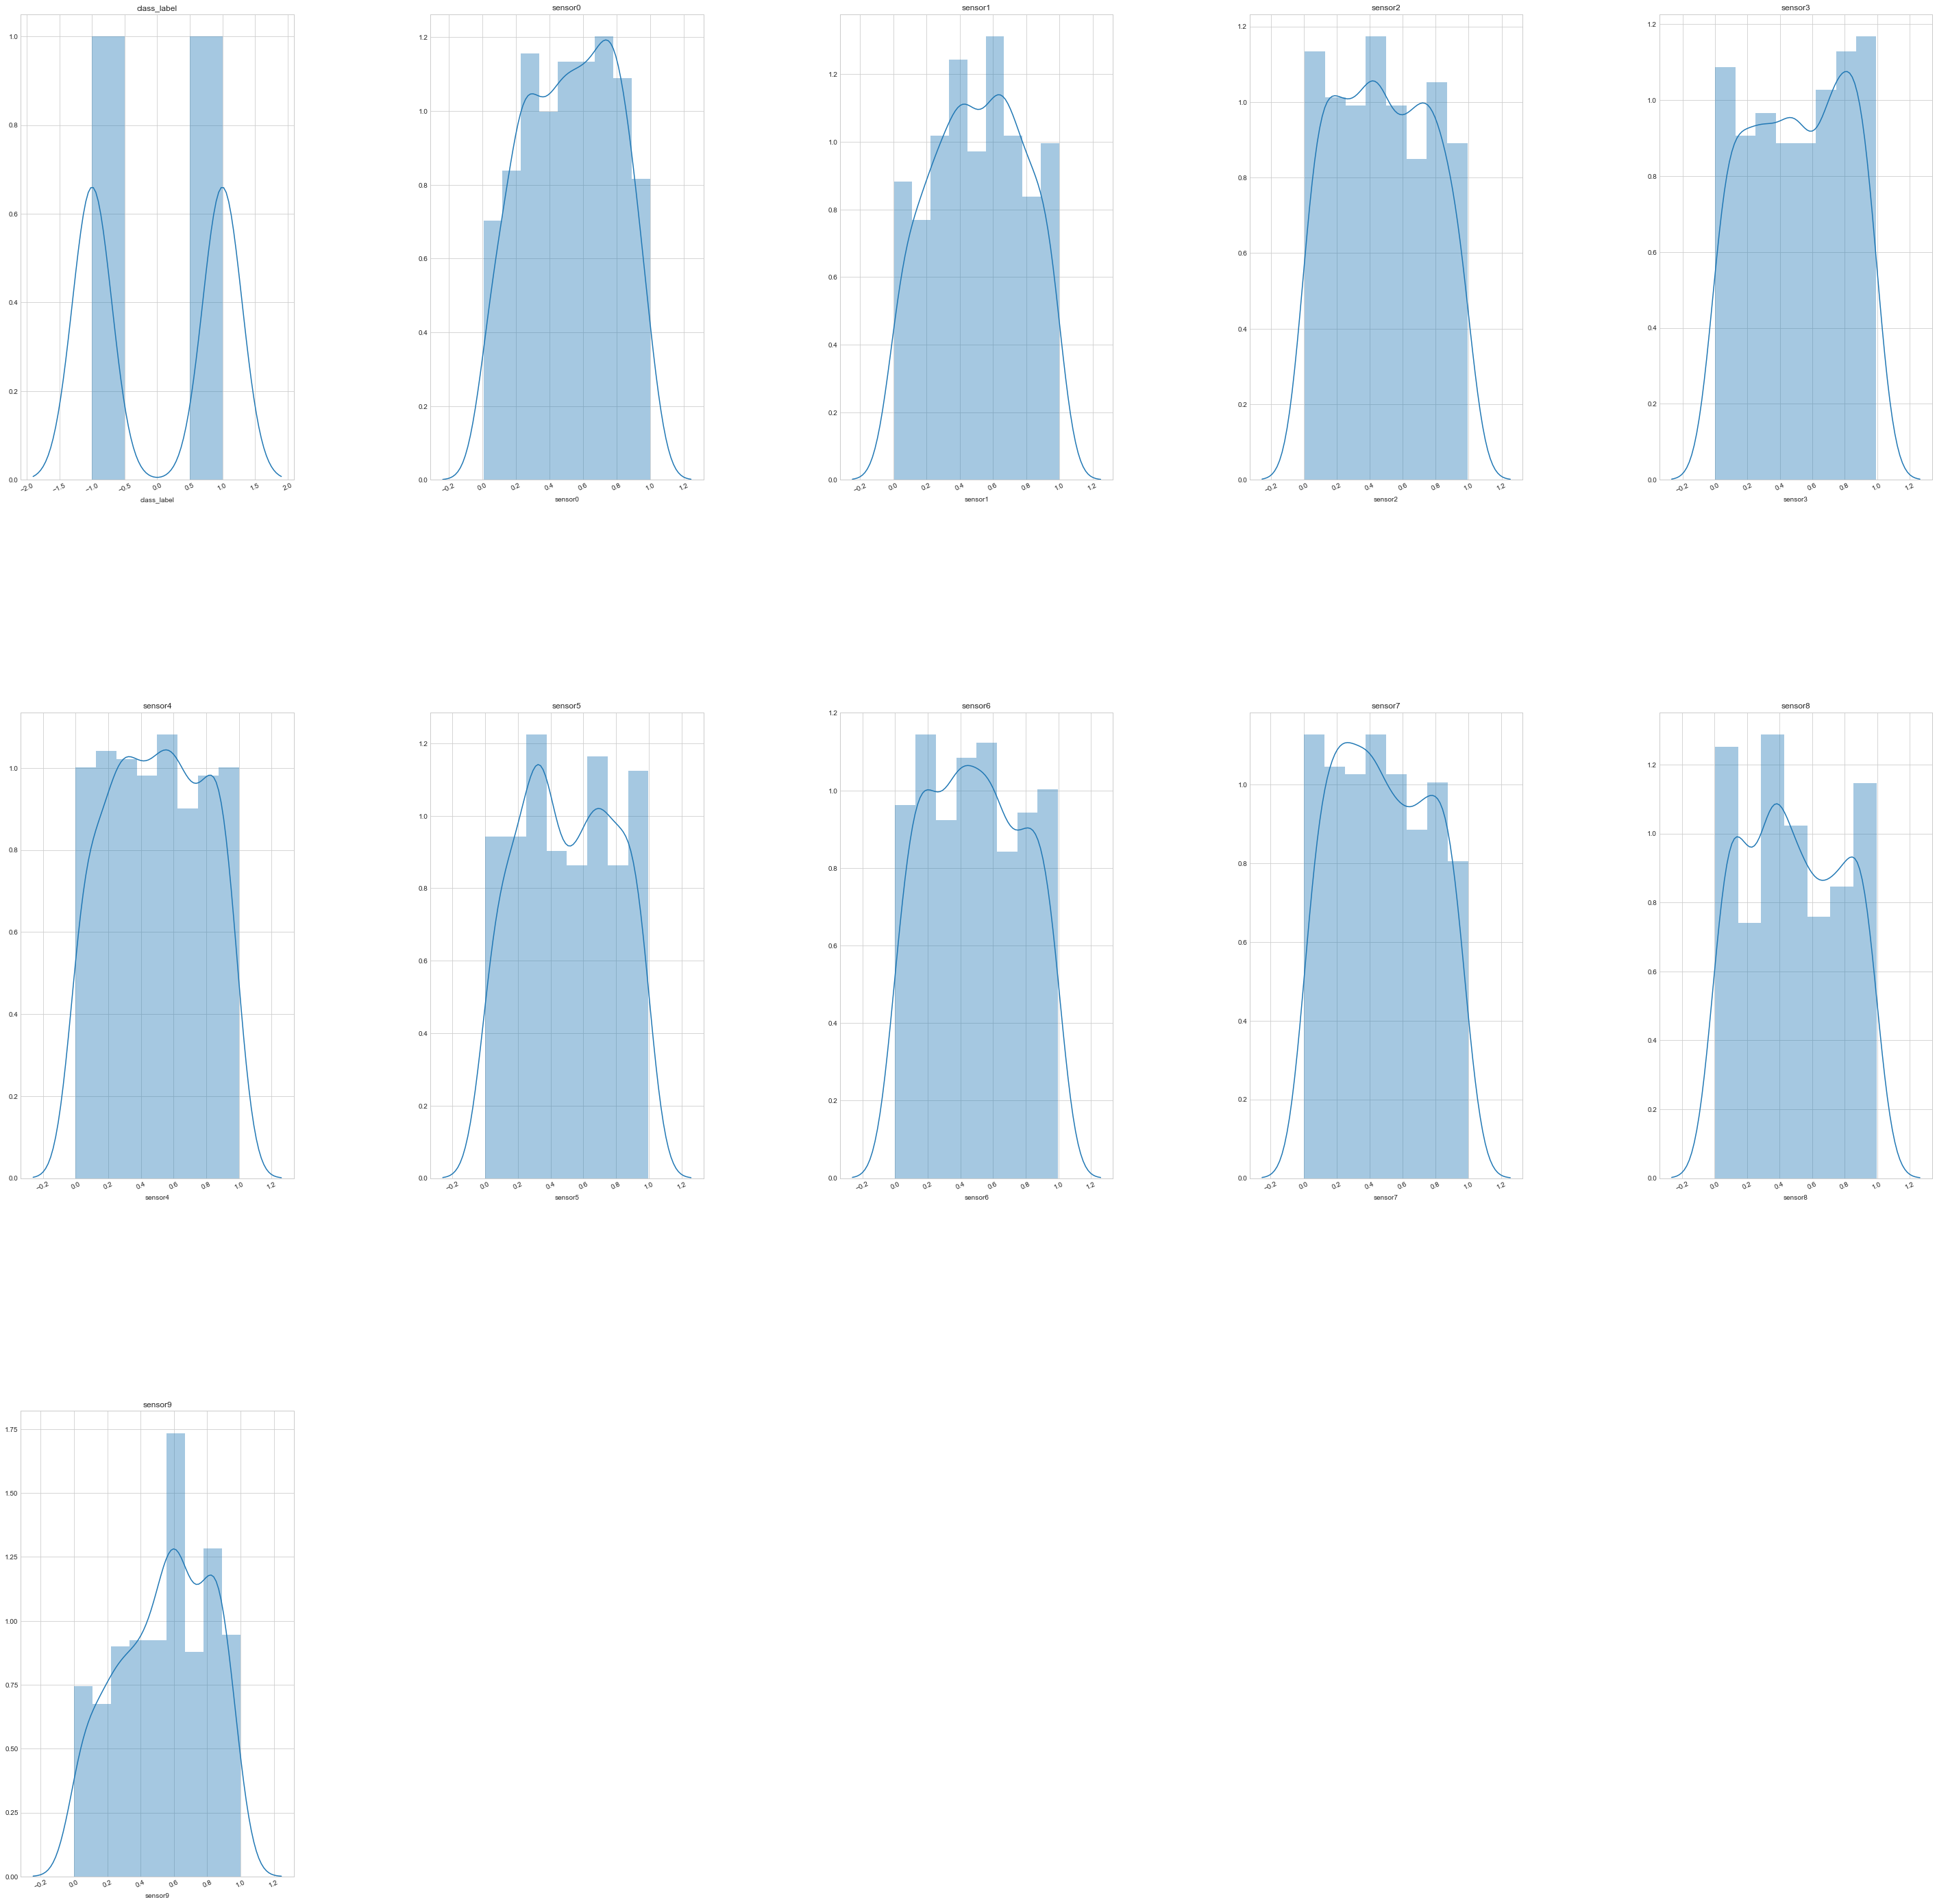

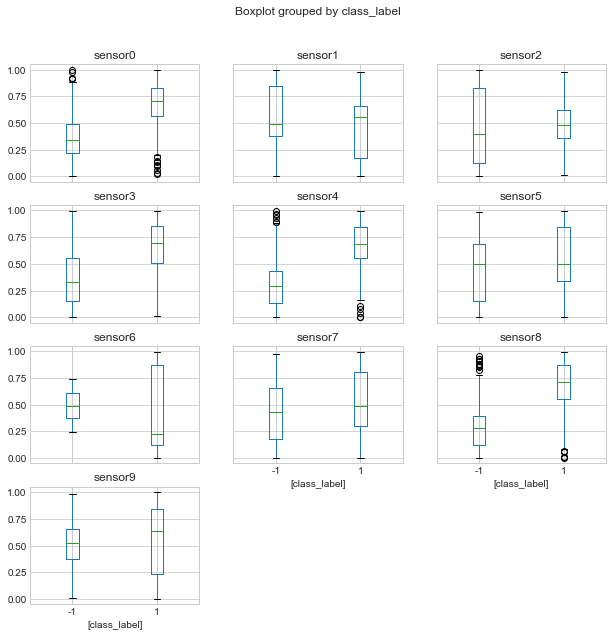

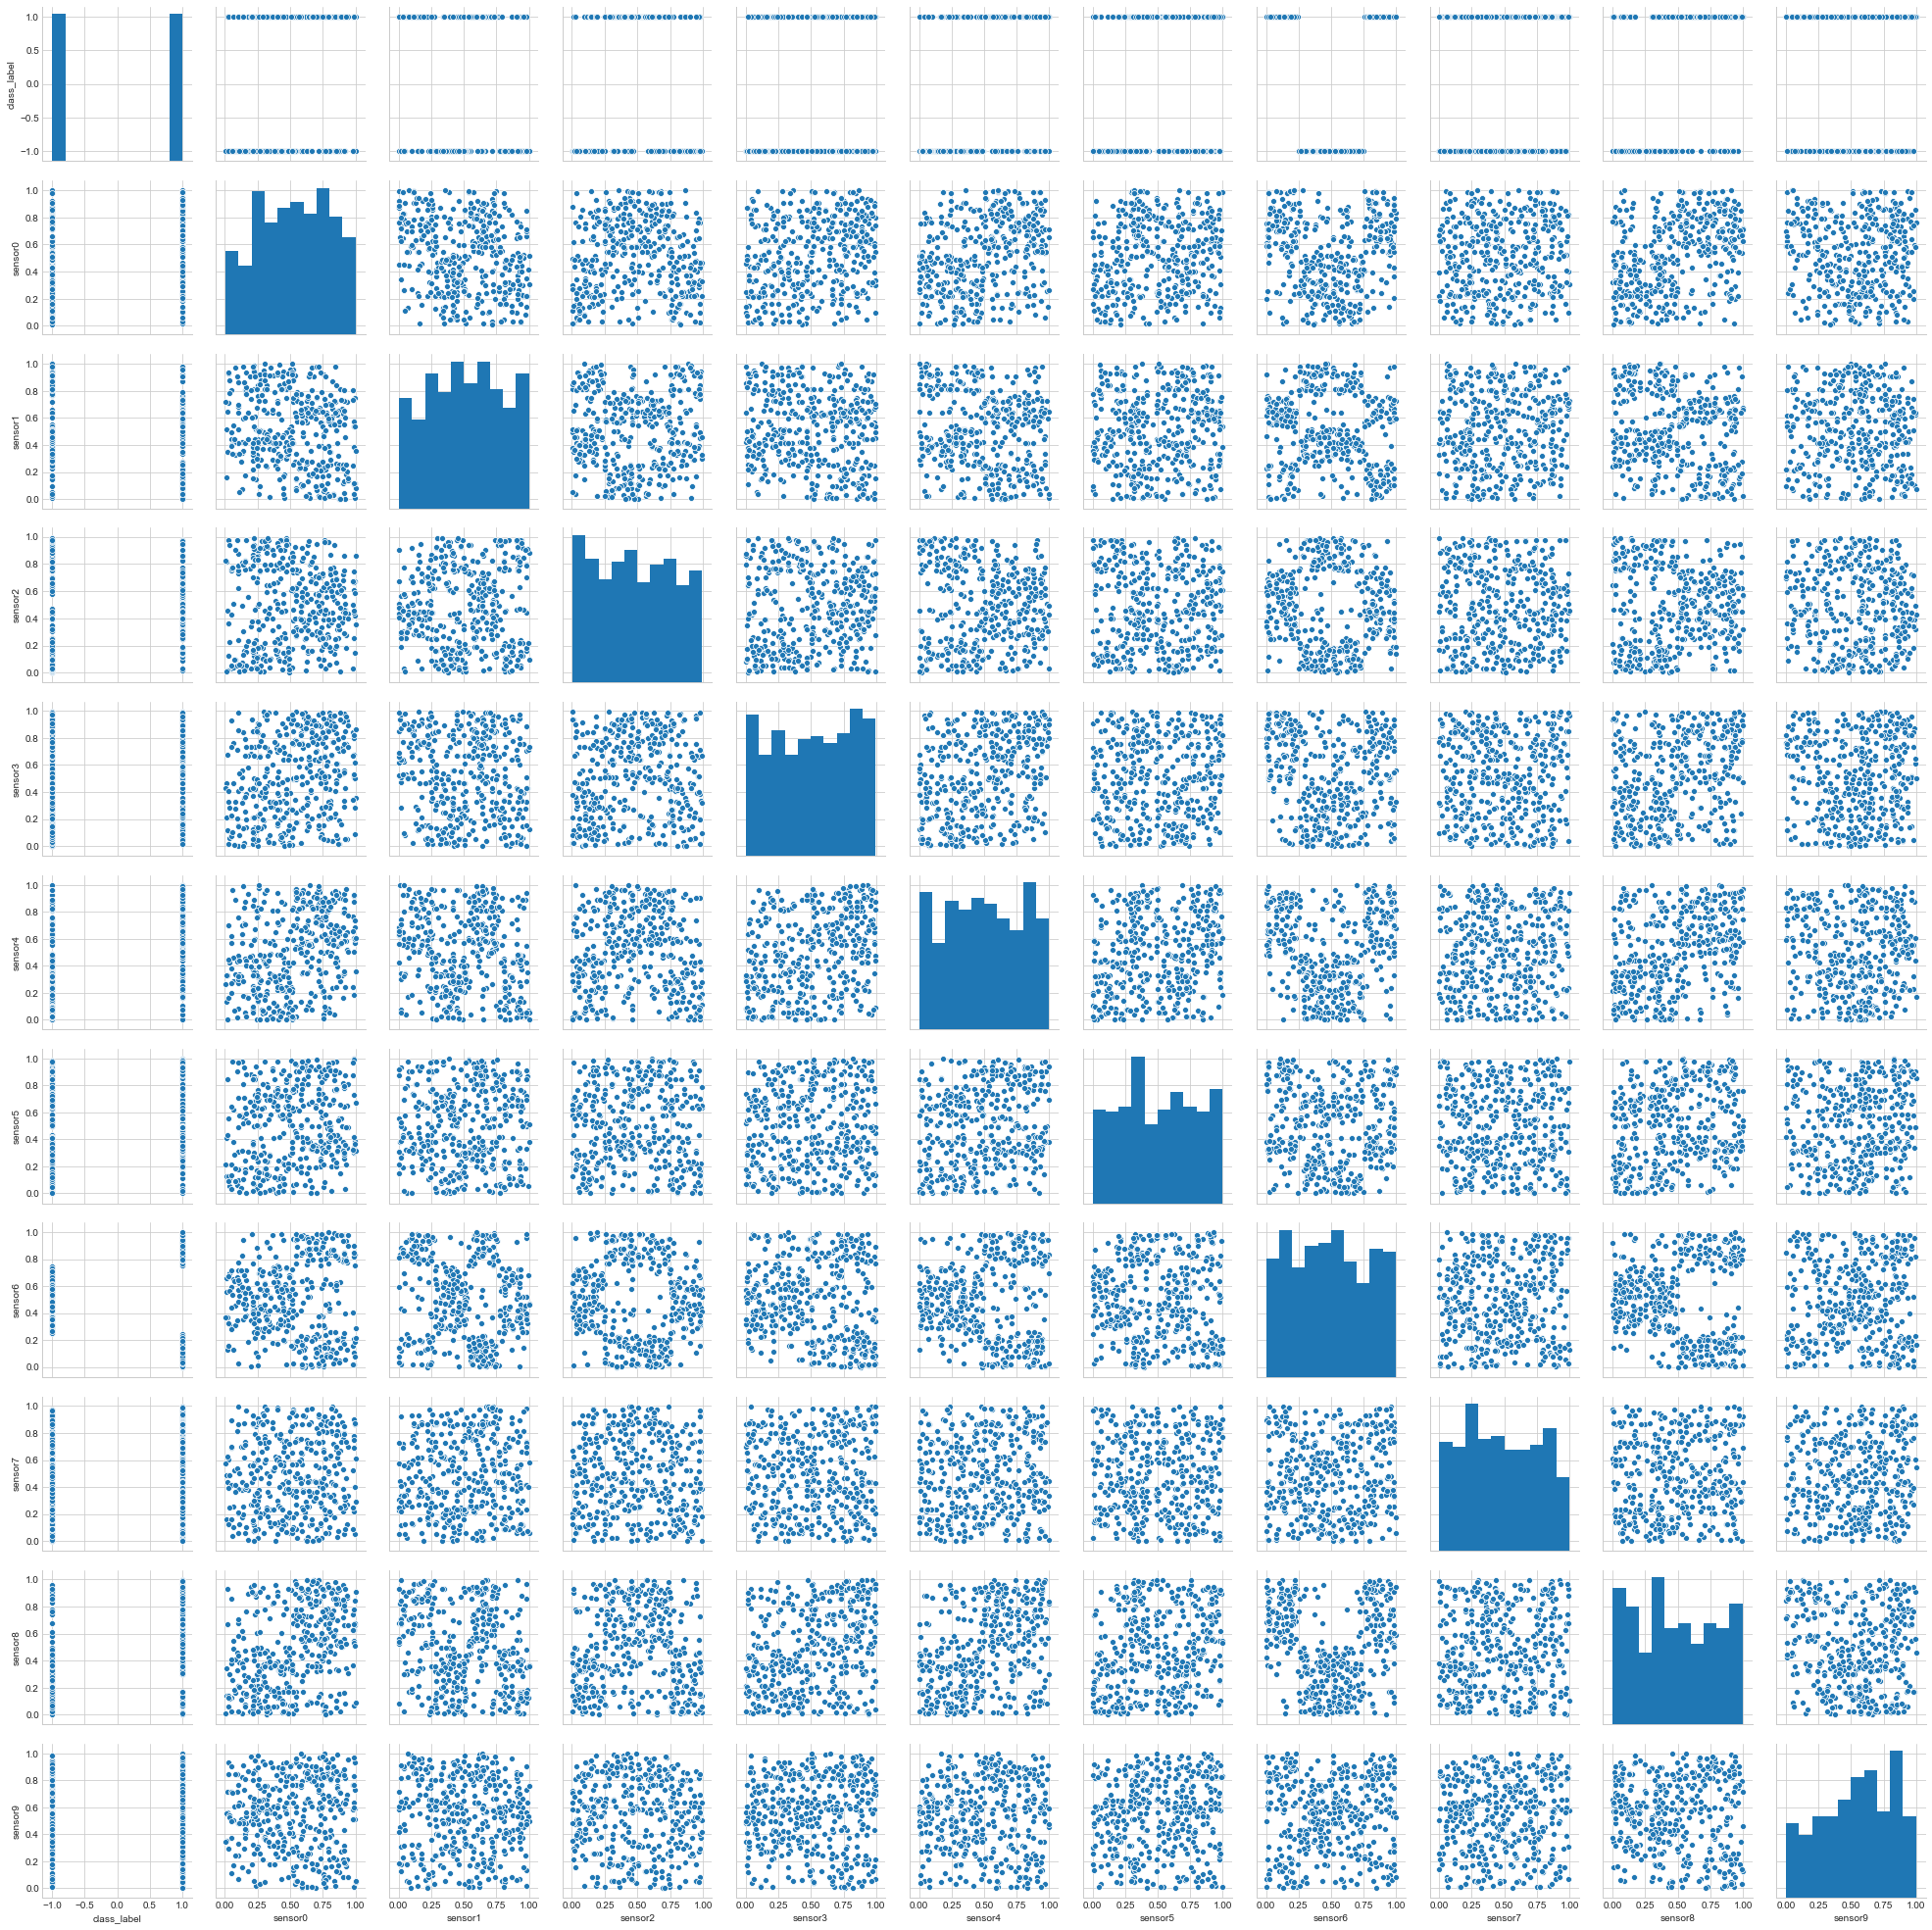

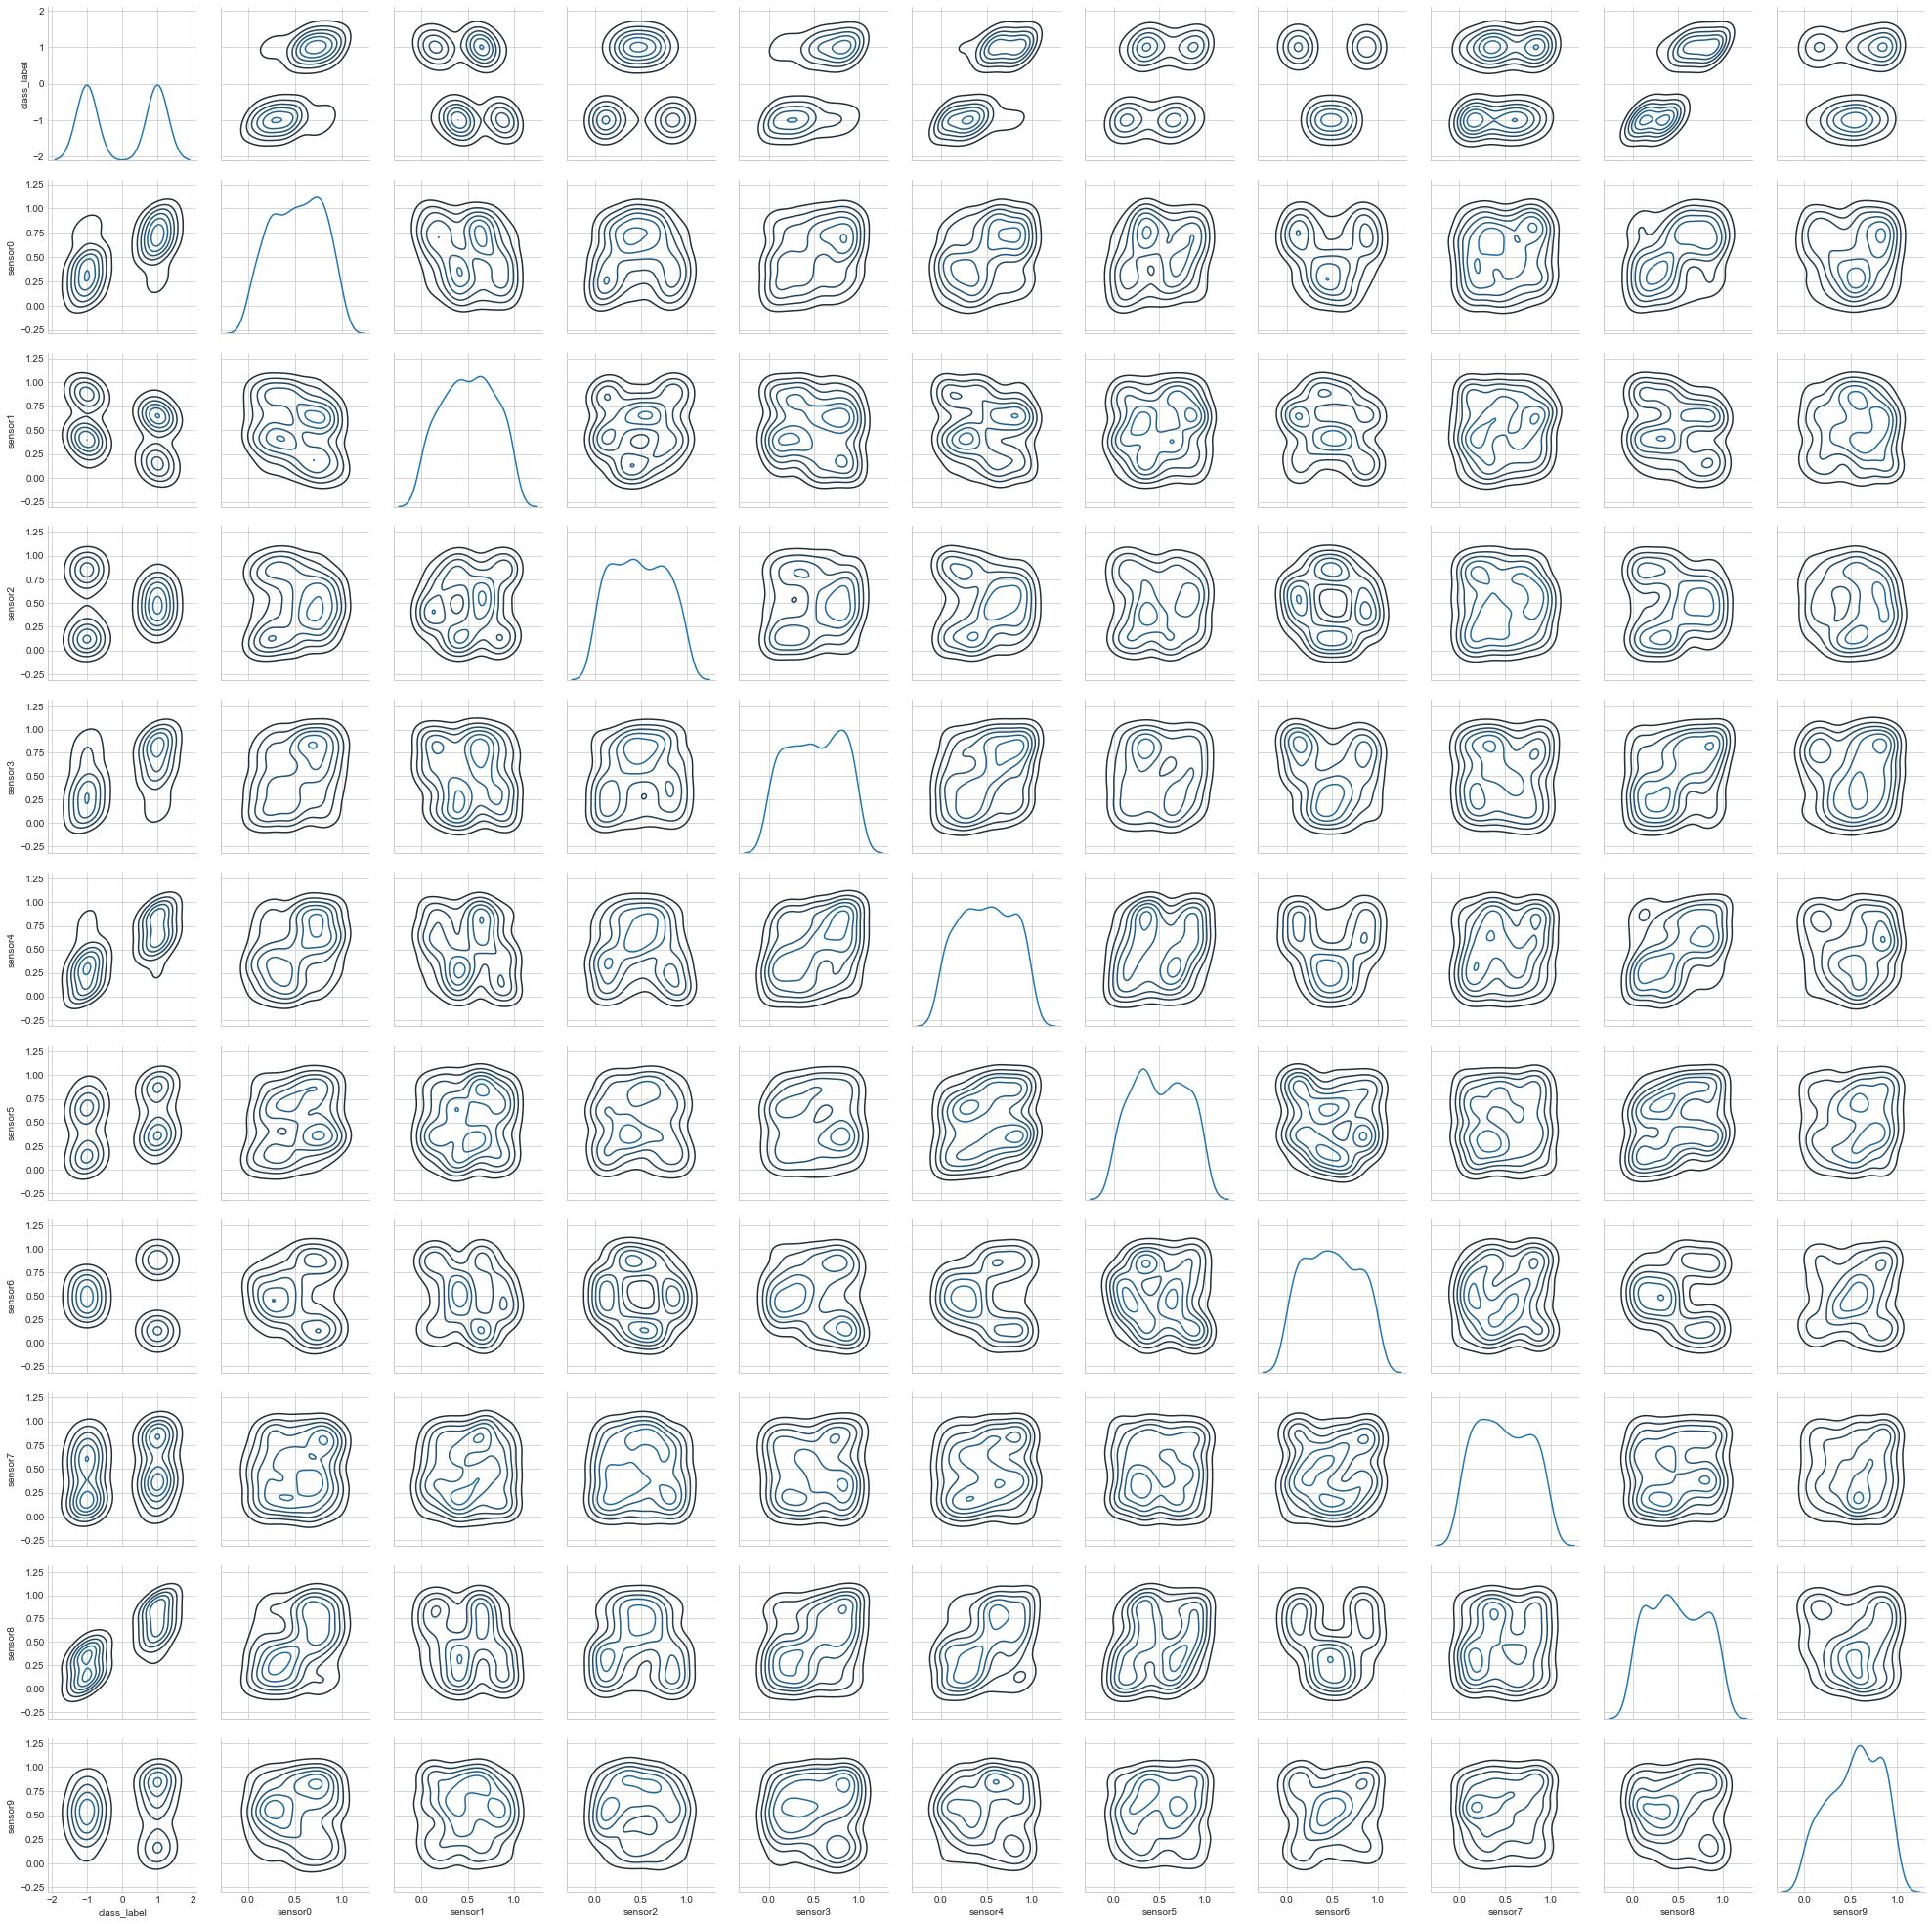

In [101]:
# plot_distribution(sensor_data) # only plot_distribution is imported.
xai.data_explainability(sensor_data, 'class_label')

In [102]:
# variable importance with logistic regression
feature_imp_logistic= xai.logistic_feature_imp(sensor_data)

Accuracy of logistic regression model on test data: 0.925
coefficients/ feature importance [[ 0.94030686 -0.53849164  0.21666031  0.86604256  1.61061959  0.36250019
   0.18950923  0.70787039  1.92506602  0.49744335]]


In [103]:
feature_imp_rf_rfe= xai.rfe_random_forest(sensor_data, 4)

imporance of sensors in classification:- {'sensor0': 1, 'sensor1': 4, 'sensor2': 2, 'sensor3': 3, 'sensor4': 1, 'sensor5': 7, 'sensor6': 1, 'sensor7': 6, 'sensor8': 1, 'sensor9': 5}


 model accuracy of ref+RF 0.9625


Accuracy of RF: 0.9875
Text(0.5, 1.0, 'relative importance of sensors')
           VarImp
sensor0  0.075451
sensor1  0.044607
sensor2  0.035931
sensor3  0.118482
sensor4  0.236136
sensor5  0.036430
sensor6  0.210100
sensor7  0.033386
sensor8  0.198369
sensor9  0.011109


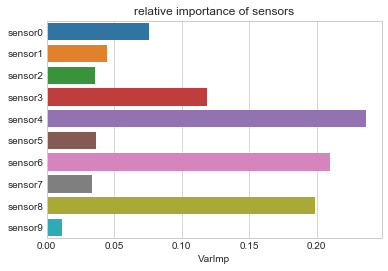

In [104]:
feature_imp_rf= xai.rf_var_imp(sensor_data)

 testing accuracy of xgboost=  1.0
      Name   val_gain  val_weight  val_cover
0  sensor8  25.473390   25.473390  25.473390
1  sensor6   6.651441    6.651441   6.651441
2  sensor0   2.269177    2.269177   2.269177
3  sensor2   1.330435    1.330435   1.330435
4  sensor4   3.102354    3.102354   3.102354
5  sensor1   1.498304    1.498304   1.498304
6  sensor7   0.297576    0.297576   0.297576
7  sensor3   0.414522    0.414522   0.414522
8  sensor5   0.300906    0.300906   0.300906
9  sensor9   0.075925    0.075925   0.075925


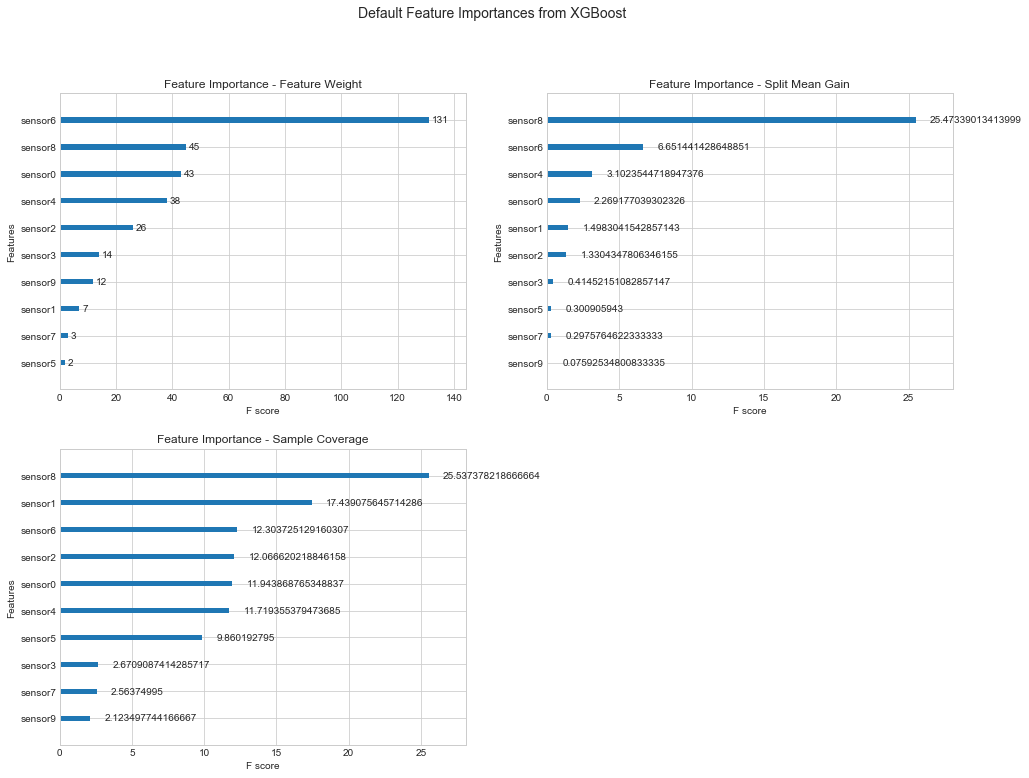

In [105]:
feature_imp_xgboost= xai.xgboost_imp( sensor_data)

In [108]:
feature_imp_lrr= xai.logstic_rule_reg(sensor_data)

Training accuracy: 0.9975 

Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))
where z is a linear combination of the following rules/numerical features:
                rule/numerical feature coefficient
0                          (intercept)     5.58402
1   sensor6 <= 0.80 AND sensor6 > 0.19    -10.3522
2                      sensor2 <= 0.28     -5.4929
3                      sensor6 <= 0.68    -5.38583
4                      sensor1 <= 0.24     4.99564
5                      sensor6 <= 0.30     4.52992
6                              sensor8     4.12248
7                              sensor0     3.92652
8                      sensor2 <= 0.68     3.73684
9                      sensor1 <= 0.79     3.06503
10                     sensor8 <= 0.46    -2.54431
11                     sensor9 <= 0.73    -2.35713
12                     sensor2 <= 0.77     2.31876
13                             sensor4     2.17489
14                     sensor0 <= 0.53    -1.83901
15            

In [ ]:
y=sensor_data['class_label']

In [ ]:
LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)

In [ ]:
logstic_rule_reg(sensor_data)

In [ ]:
expl, sha= xai.shap_dt_explanation(sensor_data)

In [ ]:
def shap_plot( sensor_data, n):
    
    X=sensor_data.iloc[:, 1:]
    l=shap.force_plot(expl.expected_value[0], sha[0][n,:], X.iloc[n,:])
    return(l)

In [109]:
xai.shap_plot(sensor_data, 5, expl, sha)